In [1]:
#supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing all required packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import xticks

In [3]:
#Import Data
x = pd.read_csv(r'C:\Users\DELL\Desktop\M.Sc. Project\Algorithm Datasets\KModes Clustering.csv')

In [4]:
#Data Discription
x.head
x.columns
x.describe()
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 5 columns):
Age                                      1001 non-null object
Gender                                   1001 non-null object
Employment Status                        1001 non-null object
Education Status (Currently Pursuing)    1001 non-null object
Hours                                    1001 non-null object
dtypes: object(5)
memory usage: 39.2+ KB


In [5]:
#Creating Data Copy
x_copy = x.copy()

In [6]:
#Encoding Categorical Variables
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
x = x.apply(le.fit_transform)
x.head(20)

,Age,Gender,Employment Status,Education Status (Currently Pursuing),Hours
0,0,0,5,4,4
1,0,0,5,4,1
2,0,1,5,4,1
3,1,1,4,2,4
4,0,1,5,4,1
5,0,0,5,4,0
6,0,1,5,4,0
7,0,0,6,2,0
8,0,0,5,4,4
9,0,1,4,5,1


In [7]:
#Applying K-Modes
from kmodes.kmodes import KModes
km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(x)
fitClusters_cao

clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = x.columns
clusterCentroidsDf

km_cao = KModes(n_clusters=3, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(x)
fitClusters_cao

x = x_copy.reset_index()

clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([x, clustersDf], axis = 1).reset_index()
combinedDf.head(10)

cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]

cluster_0.info()
cluster_1.info()
cluster_2.info()

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2219.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2219.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 2 to 1000
Data columns (total 8 columns):
level_0                                  542 non-null int64
index                                    542 non-null int64
Age                                      542 non-null object
Gender                                   542 non-null object
Employment Status                        542 non-null object
Education Status (Currently Pursuing)    542 non-null object
Hours                                    542 non-null object
cluster_predicted                        542 non-null uint16
dtypes: int64(2), object(5), uint16(1)
memory usage: 34.9+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 338 entries, 1 to 995
Data columns (total

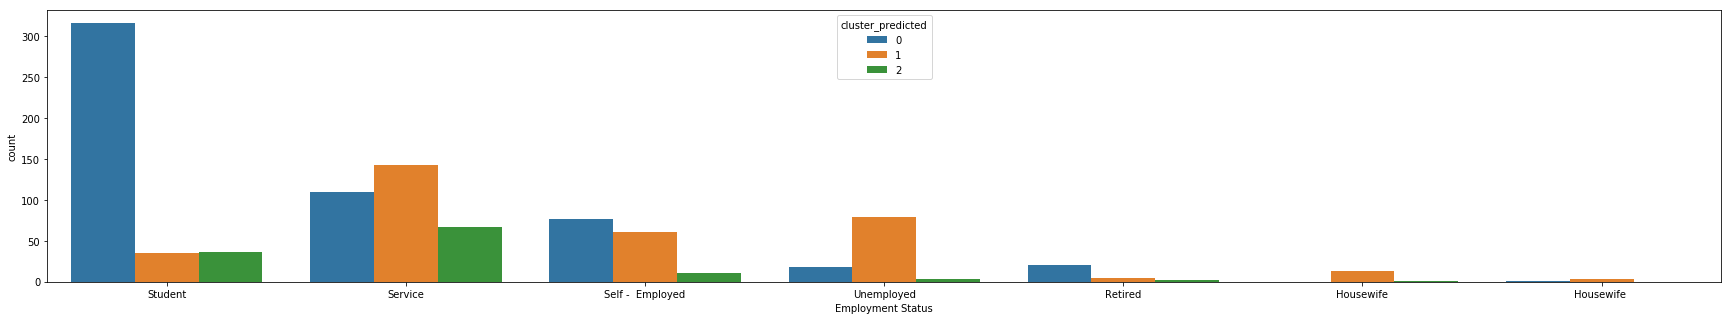

In [8]:
#Plot for Employment
plt.subplots(figsize = (30,5))
sns.countplot(x=combinedDf['Employment Status'],order=combinedDf['Employment Status'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

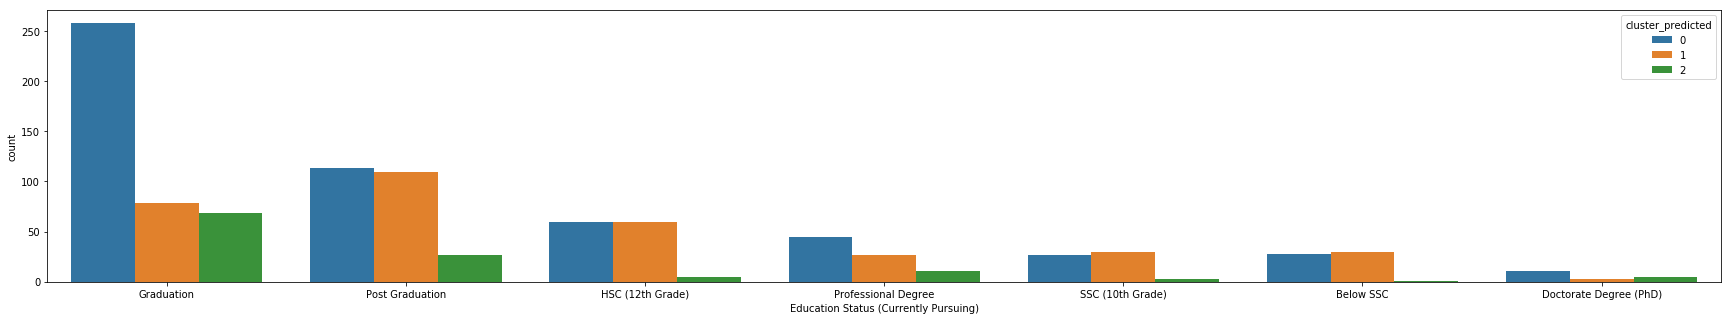

In [9]:
#Plot for Education
plt.subplots(figsize = (30,5))
sns.countplot(x=combinedDf['Education Status (Currently Pursuing)'],order=combinedDf['Education Status (Currently Pursuing)'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

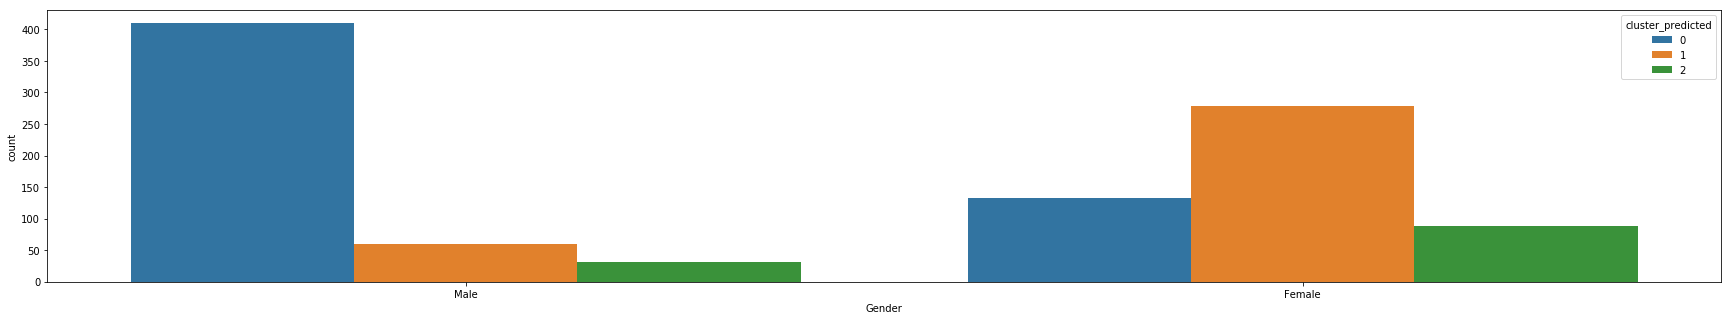

In [10]:
# Plot for Gender
plt.subplots(figsize = (30,5))
sns.countplot(x=combinedDf['Gender'],order=combinedDf['Gender'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

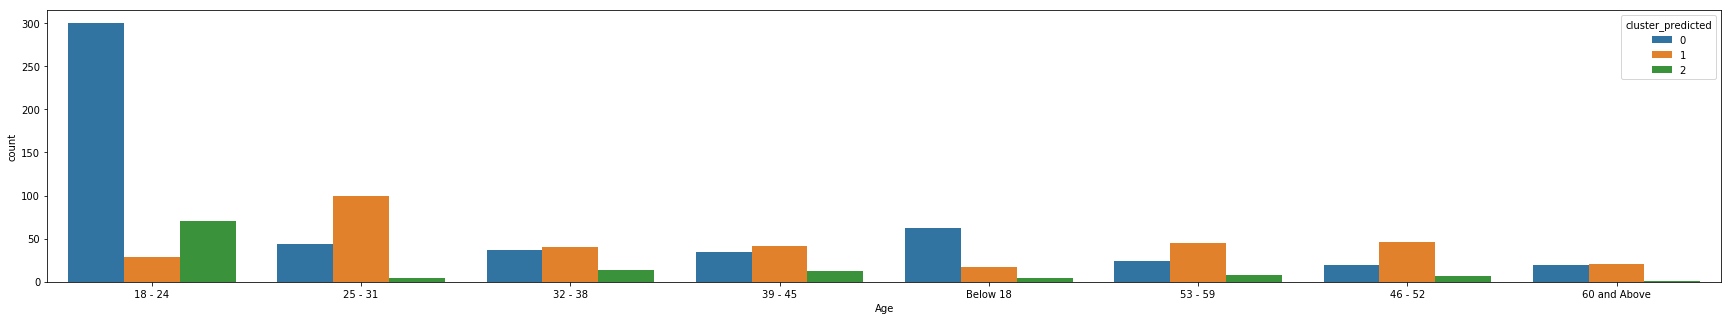

In [11]:
#Plot for Age
plt.subplots(figsize = (30,5))
sns.countplot(x=combinedDf['Age'],order=combinedDf['Age'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

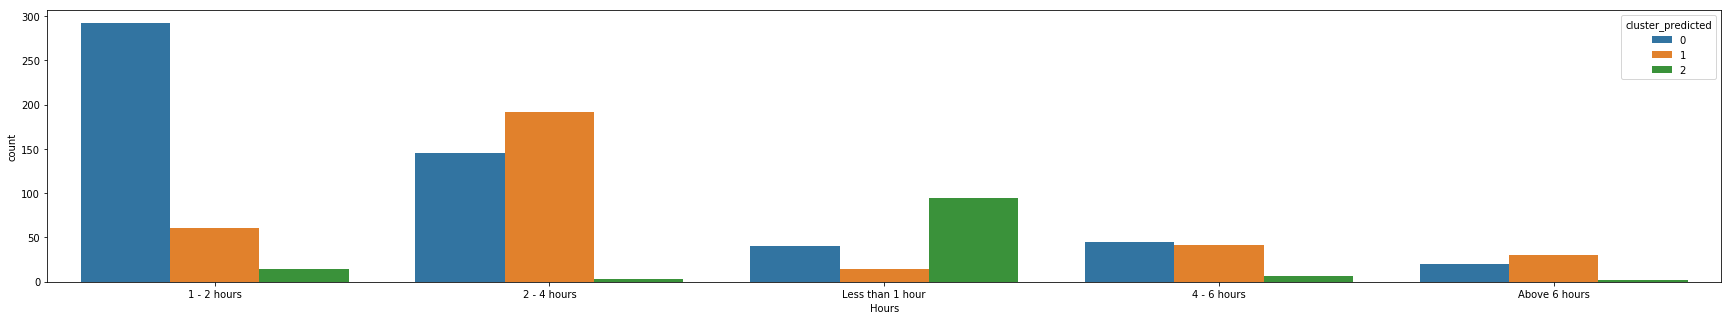

In [15]:
#Plot for Hours
plt.subplots(figsize = (30,5))
sns.countplot(x=combinedDf['Hours'],order=combinedDf['Hours'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

In [13]:
#Cluster Head
cluster_2.head(10)
cluster_1.head(10)
cluster_0.head(10)

,level_0,index,Age,Gender,Employment Status,Education Status (Currently Pursuing),Hours,cluster_predicted
2,2,2,18 - 24,Male,Student,Post Graduation,2 - 4 hours,0
4,4,4,18 - 24,Male,Student,Post Graduation,2 - 4 hours,0
5,5,5,18 - 24,Female,Student,Post Graduation,1 - 2 hours,0
6,6,6,18 - 24,Male,Student,Post Graduation,1 - 2 hours,0
7,7,7,18 - 24,Female,Unemployed,Graduation,1 - 2 hours,0
9,9,9,18 - 24,Male,Service,Professional Degree,2 - 4 hours,0
10,10,10,18 - 24,Male,Student,Graduation,Above 6 hours,0
11,11,11,18 - 24,Female,Self - Employed,Post Graduation,1 - 2 hours,0
12,12,12,18 - 24,Female,Student,Professional Degree,1 - 2 hours,0
13,13,13,18 - 24,Male,Student,HSC (12th Grade),2 - 4 hours,0
